# Bivariate Data
Welcome to the Bivariate Data section. Bivariate Data is simply a dataset that has two values instead of one. In this section, we'll go over ways we can visualize and describe relationships between random variables. You'll see the familiar scatter plot, the details of correlation and covariance, $r^2$ measures, some practical tips, and much more!

It's a short but an important one. Let's go.

## Relationships in data
The general goal of the following techniques are to describe the relationships between two variables. For example, we want to know how house price is related to house size, or salary to experience, or year to GDP. This is such a crucial and fundamental goal of statistics because by finding a good relationship, we can make good predictions. In fact, one of the simplest methods of Machine Learning, linear regression, will model a linear relationship between an explanatory (i.e. input) variable and result (i.e. output) variable. That way, all the machine has to do is plug in the value of the explanatory variable to get the result variable. We'll look at linear regression in more detail in another notebook.

## Our data: 
We're going to use one of Seaborn's built-in data sets called 'tips' that has a list of restaurant tips. This makes it easy for anyone to grab the data. But again, don't focus on the details of using Seaborn or Pandas, as here we're just focused on examining our data.

What we want to know is if there is a relationship between the total bill and the size of the tip. You've eaten out before, what is your guess?

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')
type(tips)

pandas.core.frame.DataFrame

The `type` of our tips dataset is a pandas `DataFrame`. Think of a `DataFrame` as Python's version of an excel table. Again, don't worry about it too much. There's plent of resources out there on Pandas if you want to learn more.

There are 7 variables in this dataset, but I'm going to scrub the table so we have the two pieces we want to examine: `total_bill` and `tip`.

In [3]:
tips.drop(labels=["sex", "smoker", "day", "time", "size"], axis=1, inplace=True)

### Basic statistics
Now we want to examine our dataset. In particular, we want to see the mean, standard devaition, range, and the distribution. Refer to the Descriptive Statistics notebook for more details on how we do this manually. For now, we'll use the `Series` class from Pandas to do all of it for us:

In [4]:
tips["total_bill"].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [5]:
tips["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Take a couple minutes to examine those statistics. What do they tell you? 

### Which mean?
Think back to the previous lesson on Descriptive Statistics. We went over 3 different types of means. If we wanted to get the mean for the tip percent, which should we use? 

You might see the percent sign and jump straight for the geometric mean. Afterall, that's how we averaged stock returns. But remember that these are not returns but proportions -- in other words, a tip percent has no dependence on any previous value.

You may also want to jump straight for the arithmetic mean by creating all of tip percent and averaging the value (in other words, $\frac{0.15 + 0.18 + 0.21}{3}=0.18$. This is a reasonable assumption, but is it the best mean?

Well the answer depends on what data you are trying to describe! The arithmetic mean will give you the average tip percent, which answers the question "what tip percent can I expect any given customer to give?"

But the harmonic mean answers a slightly different question: for every dollar I sell, how much tip can I expect to receive. (Remember, the harmonic mean is all about proportions). The difference is subtle, but important. Imagine if everyone that has small bills tips 20%, but everyone with large bills tips 10%. The man for my tip will be around 15%. But because those with large bills contribute so much more to my total bill amount, their tips will drag down the proportion and make it closer to 10%. 

So the harmonic mean may be better for predicting how many tips you expect given a total revenue, whereas the arithmetic mean will be better at predicting what tip percent my next customer will make.

For our example, let's take a look at these two values:

In [6]:
def arithmetic_mean(tip, bills):
    n = tip.count()
    return sum(tip/bills)/n

arithmetic_mean(tips["tip"], tips["total_bill"])

0.16080258172250478

In [7]:
def harmonic_mean(tip, bills):
    return sum(tip)/sum(bills)

harmonic_mean(tips["tip"], tips["total_bill"])

0.15153580224410024

Judging by these two numbers, we can expect any given person to tip about 16.08%. But at the end of the night, we can expect 15 cents for every dollar we sold. How is this so? This is an indication that the larger bills tend to tip less.

We won't do any more analysis on tip percentage, but this was a valuable aside on knowing what you can glean by expressing your data in different ways.

## Histograms
Back to our regularly scheduled program, let's take a look at our two distributions: `tip` and `total_bill`

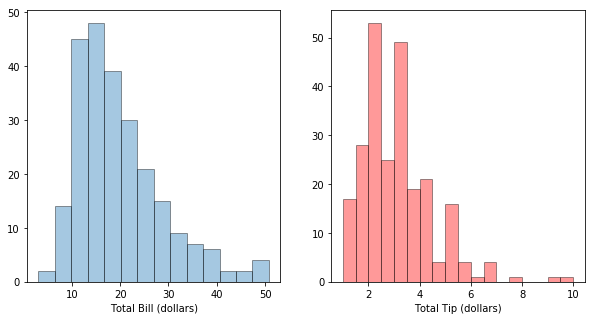

In [8]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
hist_kws={"edgecolor":"k", "lw":1}
sns.distplot(tips["total_bill"], kde=False, ax=axs[0], axlabel="Total Bill (dollars)", hist_kws=hist_kws)
sns.distplot(tips["tip"], kde=False, ax=axs[1], color='r', axlabel="Total Tip (dollars)", hist_kws=hist_kws)

From the above, we can see that the distributions are roughly the same. It's not quite normal because of the right skew (that is, the tail is long and to the right). But even though these look similar, it does not say anything definitive about the relationship. For example, each tip could be completely independently matched up with the total bill, like in the extreme case of the \$10.00 max tip getting matched to the \$3.07 minimum bill (hey, it could happen!). For a better sense of this relationship, let's introduce the

## Scatter Plot
Another familiar graph, it will plot the `total_bill` against the `tip`. In this case, `total_bill` is the explanatory variable and the `tip` is the result variable. This means we are looking at the `total_bill` value to explain the `tip` value.

Let's take a look at the scatter plot (or `lmplot` as seaborn calls it) and all will become clear:

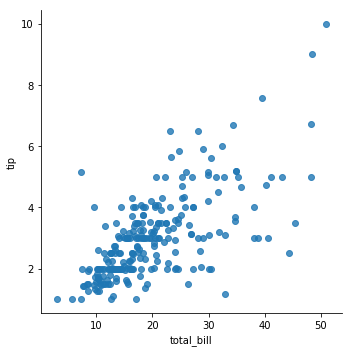

In [9]:
sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False)

Look at that! So much more useful than the histogram as we can now see the actual relationships. Each datapoint represents one total bill paired up with it's related tip. Obviously there's a strong relationship here. Since we know the average tip to be 16.1%, and a bill of 0 should give us a tip of 0, we can quickly guess that a linear relationship should be described by the following equation:

$$ y = 0 + 0.161x $$

Let's plot this line on the graph and see how accurate it might be.

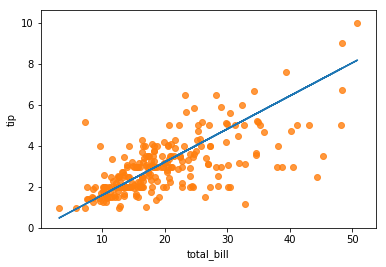

In [10]:
yvals = 0.161 * tips["total_bill"]
plt.plot(tips["total_bill"], yvals)
sns.regplot(tips["total_bill"], tips["tip"], fit_reg=False)

###### That looks pretty good, but of course mathematicians aren't excited by "looks pretty good." They need numbers to back that claim up. We'll get in to finding the best line in the next notebook on linear regression, but for now be settled that it there's a clear positive relationship (meaning $y$ goes up as $x$ goes up) between the variables.

_Refere back tou the section on "Which mean?" See how the higher bills tend to be below the blue line? This again is more confirmation that the larger bills tend to tip less. Of course in a small dataset, you can't call this a significant trend, but it does corrobrate the discrepency in our earlier analysis._

## Covariance and Correlation
### Covariance
Let's now talk about how strong this positive relationship is. In other words, how sure can we be that if $x$ goes up $y$ will follow? Statisticians look at the way these values vary together with a term called _covariance_. When two variables tend to move together, their covariance is positive. If they move opposite, it's negative. If they are completely independent, it's 0.

The covariance for $N$ samples with random variables $X$ and $Y$ is given by the formula

$$ Q = \frac{1}{N-1} \sum_{i=1}^{N} (x_{i}-\bar{x})(y_i-\bar{y}) $$

In Python:

In [11]:
# A useful helper function will be to define the dot product between two vectors
# dot product is defined as <v1, v2> * <u1, u2> = v1*u1 + v2*u2
from operator import mul
def dot(v, u):
    return sum(map(mul, v,u))

# Another useful helper function will be to take a list and output another list
# that contains the differences of the means
def diff_mean(values):
    mean = values.mean() # use Panda's arithmetic mean function
    deltas = []
    for v in values:
        deltas.append(v-mean)
    return deltas

def covariance(x, y):
    n = len(x)
    return dot(diff_mean(x), diff_mean(y)) / (n-1)

covariance(tips["total_bill"], tips["tip"])

8.3235016292248538

8.3235 is a value without a lot of context. Think about what the units of that are: it's essentially 2022.61 dollars squared ($\$^2$). Do you every pay for things in dollars squared? Or if we use two variables with totally different units, like salary (dollars) and years, we get units of dollar-years. This is really difficult to get a sense of scale or closeness of relationship.

### Correlation

Instead, statisticians will often use the correlation (or Pearson Correlation Coefficient to be formal) to report a number that everyone can understand. Correlation is a number between -1 and +1. If it's 1, there's a perfect positive relationship and vice versa. A correlation of 0 means there's absolutely no relationship. But keep in mind, just because there's a correlation of 0, doesn't mean that there's no _linear_ correlation between values.

Take this helpful image from Wikipedia:
![correlations](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg "Pearson Correlation Coefficients")

The correlation coefficient is almost always denoted by the variable $r$. The formula for a sample is:

$$ r = \frac{\sum\nolimits_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sqrt{\sum\nolimits_{i=1}^{n}(x_i-\bar{x})^2\sum\nolimits_{i=1}^{n}(y_i-\bar{y})^2}} $$ 

Before you freak out, we've seen all of these pieces before. This is just the covariance divided by the product of the standard deviations. Perhaps a simpler equation?

$$ \rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X\sigma_Y} $$

Now in code:

In [12]:
def correlation(x, y):
    std_x = x.std() # again, just use Panda's method
    std_y = y.std()
    if std_x > 0 and std_y > 0:
        return covariance(x,y) / (std_x*std_y)
    else:
        return 0
    
correlation(tips["total_bill"], tips["tip"])

0.67573410921136456

### Interpretation

How are we to interpret that number? A lot of scientists will try to set guidelines, but it really depends on context and case. In instances where data is measured with precision and follows fundamental laws of nature, 0.675 is pretty low. Even a correlation of 0.8 may be low. But in social sciences, where people certainly do not follow any fundamental and rational laws of nature, that might be pretty strong. As you explore your dataset more and other datasets in similar fields, you'll start to develop more context around this number.

### Correlation $\ne$ Causation

You hear this a lot, but it's worth repeating. Just because `total_bill` and `tip` are correlated, does not mean that the increase in `total_bill` _causes_ an increase in `tip`. (Although that's pretty clear in this case as `tip` is directly derived from `total_bill`, but regardless watch out). The aim of many people wielding statistics is to prove one particular point: _their point_. Those who want there to be causation will probably drop a headline like "Study finds new link between coffee and cancer!", whereas those who don't want to give up their morning joe (including yours truly), will point out that people who smoke probably also drink coffee. So how are you to know it's the coffees fault?

Welcome to the wild world of statistics. Keep your wits and your logic about you and you'll do just fine here, kid.